<a href="https://colab.research.google.com/github/U-11-Agar/timeseries-analysis/blob/main/open_IIT_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd

In [29]:
df=pd.read_csv("/content/shimla data.csv")
df.head()

,Date,Domestic Visitors,Foreign Visitors,Total Transport,temperature_2m (°C),relativehumidity_2m (%),windspeed_10m (km/h),rain (mm)_sum,snowfall (cm)_sum
0,03-01-2010,38127,1768,175,3.815278,65.06944,4.450000,10.6,2.10
1,10-01-2010,38139,1752,311,3.839286,67.27381,5.098810,0.2,0.00
2,17-01-2010,38167,1779,145,2.242857,62.92857,5.214286,2.3,9.94
3,24-01-2010,50814,1764,232,3.832143,59.34524,4.985714,0.7,0.00
4,07-02-2010,36032,1514,85,4.267857,61.23214,5.006548,11.7,0.21


In [30]:
df.columns

Index(['Date', 'Domestic Visitors', 'Foreign Visitors', 'Total Transport',
       'temperature_2m (°C)', 'relativehumidity_2m (%)',
       'windspeed_10m (km/h)', 'rain (mm)_sum', 'snowfall (cm)_sum'],
      dtype='object')

In [31]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' column as the index
df.set_index('Date', inplace=True)

# Display the DataFrame with 'Date' as the index
print(df)

            Domestic Visitors  Foreign Visitors  Total Transport  \
Date                                                               
2010-03-01              38127              1768              175   
2010-10-01              38139              1752              311   
2010-01-17              38167              1779              145   
2010-01-24              50814              1764              232   
2010-07-02              36032              1514               85   
...                       ...               ...              ...   
2022-06-11              38762               413              417   
2022-11-13              48562               426              402   
2022-11-20              48691               386              371   
2022-11-27              48581               421              371   
2022-04-12              64596               448              323   

            temperature_2m (°C)  relativehumidity_2m (%)  \
Date                                                   

<ipython-input-31-aa0069ddd6be>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [32]:
df_test = df.iloc[475:,:]
df_train = df.iloc[:475,:]

In [33]:
df.columns

Index(['Domestic Visitors', 'Foreign Visitors', 'Total Transport',
       'temperature_2m (°C)', 'relativehumidity_2m (%)',
       'windspeed_10m (km/h)', 'rain (mm)_sum', 'snowfall (cm)_sum'],
      dtype='object')

In [43]:
!pip install yfinance
import yfinance as yf
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional, LeakyReLU,Dropout,BatchNormalization
from keras.losses import mean_squared_error
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.metrics import RootMeanSquaredError
from sklearn.preprocessing import StandardScaler
# Define the LSTM model architecture

# Define the symbol for the stock to trade


# Download historical stock prices for the given symbol
# df = yf.download(tickers=symbol, start="2019-01-01",end="2022-04-01")
# df_test = yf.download(tickers=symbol, start="2022-04-01")
# df.dropna(inplace=True, axis=0)
# df_test.dropna(inplace=True, axis=0)
# df.set_index('Date', inplace=True)





def data_reshape(x_train, y_train, n_steps, n_features, X, y):
    for i in np.arange(n_steps, len(x_train)):
        X.append(x_train.iloc[i-n_steps:i, :])
        y.append(y_train.iloc[i, :])
    X, y = np.array(X), np.array(y)
    X = np.reshape(X, (X.shape[0], n_steps, n_features))
    return X, y

# Define the trading strategy function


def trading_strategy(model, X,y_pred):
    y_pred = model.predict(X)
    return y_pred


def lstm_model(model,n_steps,n_features):
  model.add(Bidirectional(LSTM(units=6, return_sequences=True, input_shape=(n_steps, n_features), use_bias=True,activation=LeakyReLU(alpha=0.9))))
  model.add(Bidirectional(LSTM(units=12, return_sequences=True,use_bias=True,dropout=0.1,activation=LeakyReLU(alpha=0.8))))
  model.add(Bidirectional(LSTM(units=12, return_sequences=True,use_bias=True,dropout=0.1)))
  model.add(Bidirectional(LSTM(units=12, return_sequences=True,use_bias=True,dropout=0.1,activation=LeakyReLU(alpha=0.8))))
  model.add(Bidirectional(LSTM(units=6, use_bias=True,activation=LeakyReLU(alpha=0.9),dropout=0.2)))
  model.add(Dense(units=1, activation='linear'))
  # model.compile(loss='Binary_cr', optimizer=Adam(0.001,clipnorm=0.01), metrics=['accuracy','mse','mae'])
  model.compile(loss='mse', optimizer=SGD(), metrics=['mse','mae'], run_eagerly=True)
  # model.compile(optimizer='adam', loss=mean_squared_error)
  return model




from sklearn.preprocessing import MinMaxScaler

# Use MinMaxScaler instead of StandardScaler
# scaler = MinMaxScaler()

# # Assuming df_train and df_test are your training and test DataFrames
# df_scaled_model = pd.DataFrame(scaler.fit_transform(df_train), columns=df_train.columns)
# df_test_scaled_model = pd.DataFrame(scaler.transform(df_test), columns=df_test.columns)



scaler=StandardScaler()
df_scaled_model=pd.DataFrame(scaler.fit_transform(df_train),columns=df_train.columns)
df_test_scaled_model=pd.DataFrame(scaler.fit_transform(df_test),columns=df_test.columns)

# Define the number of time steps and features for the LSTM model
n_steps = 6
n_features = df_scaled_model.drop(['Domestic Visitors', 'Foreign Visitors'],axis=1).shape[1]

model = Sequential()
model = lstm_model(model,n_steps,n_features)
# Train the LSTM model
X_train = df_scaled_model.drop(['Domestic Visitors', 'Foreign Visitors'],axis=1)
# y_train = data_model[['Open', 'Close']]
y_train = df_scaled_model[['Domestic Visitors']]
# X_train.dropna(inplace=True,axis=0)
# y_train.dropna(inplace=True,axis=0)
X = []
y = []
X, y = data_reshape(X_train, y_train, n_steps, n_features, X, y)
model.fit(X, y, epochs=100, batch_size=8)
x_test=df_test_scaled_model.drop(['Domestic Visitors', 'Foreign Visitors'],axis=1)
y_test=df_test_scaled_model[['Domestic Visitors']]
X_test=[]
Y_test=[]
X_test,Y_test=data_reshape(x_test, y_test, n_steps, n_features, X_test, Y_test)

y_pred = []
y_pred = trading_strategy(model, X_test,y_pred)


Epoch 1/100
59/59 [==============================] - 35s 534ms/step - loss: 0.9810 - mse: 0.9810 - mae: 0.7703
Epoch 2/100
59/59 [==============================] - 25s 422ms/step - loss: 0.9671 - mse: 0.9671 - mae: 0.7776
Epoch 3/100
59/59 [==============================] - 26s 433ms/step - loss: 0.9523 - mse: 0.9523 - mae: 0.7612
Epoch 4/100
59/59 [==============================] - 27s 456ms/step - loss: 0.9236 - mse: 0.9236 - mae: 0.7543
Epoch 5/100
59/59 [==============================] - 26s 435ms/step - loss: 0.8762 - mse: 0.8762 - mae: 0.7387
Epoch 6/100
59/59 [==============================] - 25s 432ms/step - loss: 0.8291 - mse: 0.8291 - mae: 0.7102
Epoch 7/100
59/59 [==============================] - 26s 436ms/step - loss: 0.7680 - mse: 0.7680 - mae: 0.6786
Epoch 8/100
59/59 [==============================] - 26s 434ms/step - loss: 0.7604 - mse: 0.7604 - mae: 0.6805
Epoch 9/100
59/59 [==============================] - 25s 431ms/step - loss: 0.7339 - mse: 0.7339 - mae: 0.6690
E

In [44]:
import matplotlib.pyplot as plt

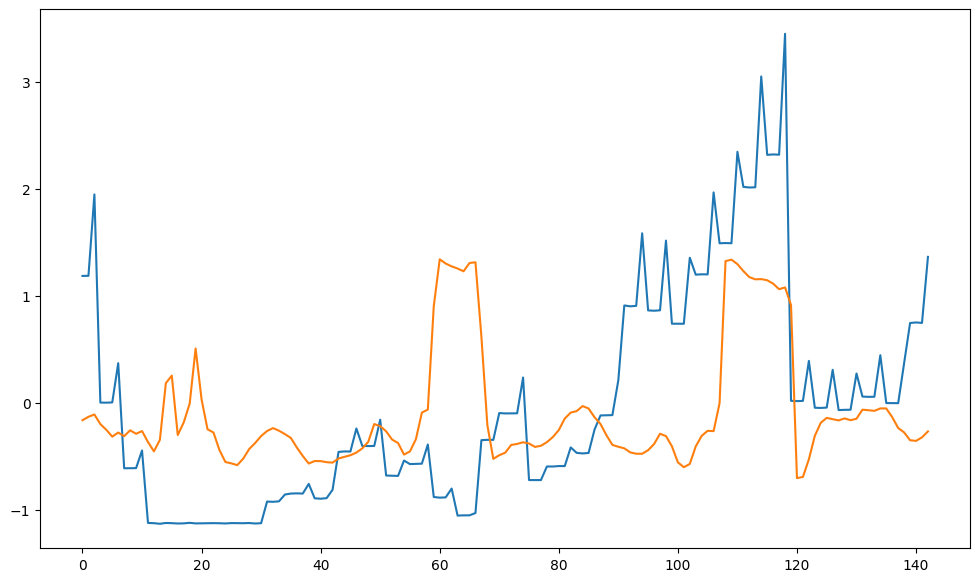

In [45]:
fig=plt.figure(figsize=(12,7))
plt.plot(Y_test)
# plt.show()
plt.plot(y_pred)
plt.show()

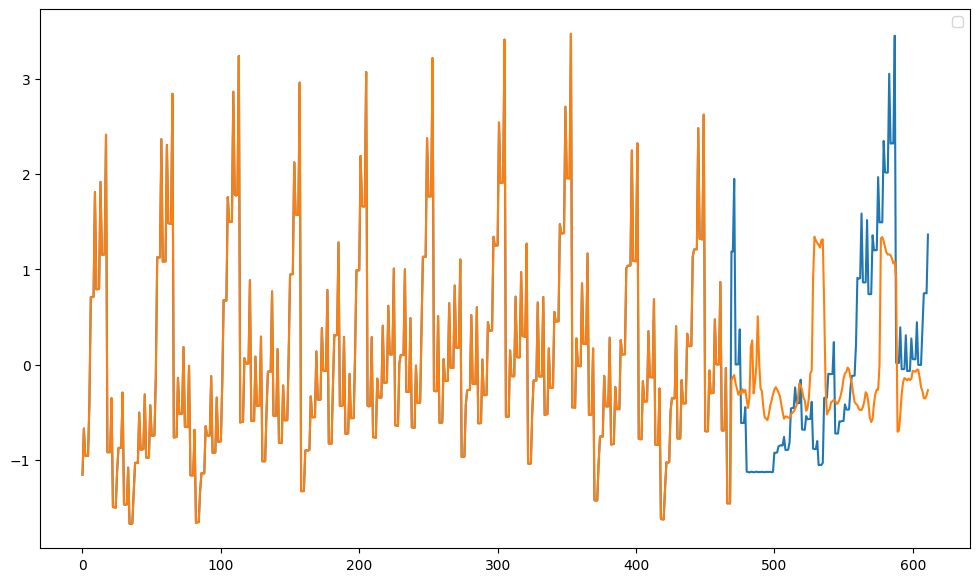

In [46]:
fig=plt.figure(figsize=(12,7))
plt.plot(np.append(y,Y_test))
plt.plot(np.append(y,y_pred))
plt.legend()
plt.show()